# The Normal Equation

In [2]:
"""
The value of theta that minimizes cost function, normal equation is used.
theta = (XTX)-1 XT Y
Testing the equation
"""

'\nThe value of theta that minimizes cost function, normal equation is used.\ntheta = (XTX)-1 XT Y\nTesting the equation\n'

In [3]:
import numpy as np

In [93]:
X = 2*np.random.rand(100,1)

In [94]:
Y = 4 + 3*X + np.random.randn(100, 1)

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # x0 = 1 ias added

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [20]:
theta_best

array([[3.94610817],
       [3.0048723 ]])

In [21]:
# Making new predictions

In [23]:
X_new = np.array([[0], [2]])

In [26]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [32]:
y_predict = X_new_b.dot(theta_best)

In [33]:
y_predict

array([[3.94610817],
       [9.95585276]])

In [34]:
from matplotlib import pyplot as plt

(0.0, 2.0, 0.0, 15.0)

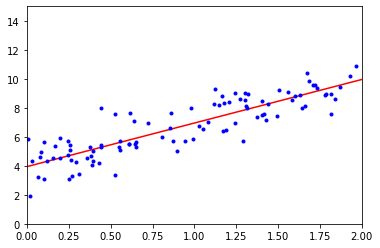

In [41]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])

# Linear Regression using scikit-learn 

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X, Y)

LinearRegression()

In [46]:
lin_reg.intercept_, lin_reg.coef_

(array([3.94610817]), array([[3.0048723]]))

In [47]:
lin_reg.predict(X_new)

array([[3.94610817],
       [9.95585276]])

# Using lstsq function

In [49]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y, rcond=1e-6)

In [50]:
theta_best_svd

array([[3.94610817],
       [3.0048723 ]])

# Gradient Descent

In [51]:
"""
Gradient vector of the cost function = (2/m)XT(X*theta - Y)
"""

'\nGradient vector of the cost function = (2/m)XT(X*theta - Y)\n'

In [52]:
eta = 0.1 # learning rate

In [53]:
n_iterations = 1000
m = 100

In [54]:
theta = np.random.randn(2,1)

In [55]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta*gradients

In [56]:
theta

array([[3.94610817],
       [3.0048723 ]])

# Stochastic Gradient Descent

In [57]:
n_epochs = 50
t0, t1 = 5, 50

In [58]:
def learning_schedule(t):
    return t0 / (t + t1)

In [59]:
theta = np.random.randn(2, 1)

In [60]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [61]:
theta

array([[3.91446906],
       [2.98358086]])

In [62]:
from sklearn.linear_model import SGDRegressor

In [64]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [69]:
sgd_reg.fit(X, Y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [70]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91875941]), array([2.99875396]))

# Polynomial Regression

In [88]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
X_poly = poly_features.fit_transform(X)

In [76]:
X[0]

array([1.4070244])

In [77]:
X_poly[0]

array([1.4070244 , 1.97971767])

In [78]:
lin_reg = LinearRegression()

In [79]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [80]:
lin_reg.intercept_, lin_reg.coef_

(array([1.90466272]), array([[1.02984011, 0.5328026 ]]))

# Learning Curves

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

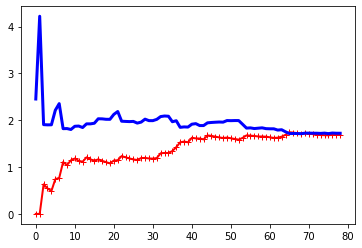

In [89]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
    
])

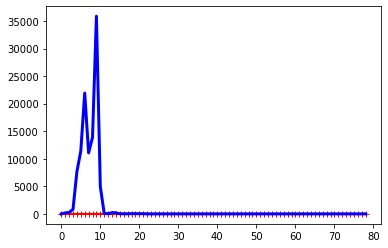

In [95]:
plot_learning_curves(polynomial_regression, X, Y)

# Ridge Regression

In [96]:
from sklearn.linear_model import Ridge

In [98]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, Y)
ridge_reg.predict([[1.5]])

array([[8.43243702]])

In [99]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, Y.ravel())

SGDRegressor()

In [100]:
sgd_reg.predict([[1.5]])

array([8.5413015])

# Lasso Regression

In [101]:
from sklearn.linear_model import Lasso

In [102]:
lasso_reg = Lasso(alpha=0.1)

In [103]:
lasso_reg.fit(X,Y)

Lasso(alpha=0.1)

In [104]:
lasso_reg.predict([[1.5]])

array([8.3406664])

# Elastic Net

In [105]:
from sklearn.linear_model import ElasticNet

In [106]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [107]:
elastic_net.fit(X, Y)

ElasticNet(alpha=0.1)

In [108]:
elastic_net.predict([[1.5]])

array([8.2254755])